## Types Of Transformation
1. Standardization
2. Normalization or Scaling to Minimum And Maximum values
3. Robust scaler or Scaling To Median And Quantiles
4. Guassian Transformation :

        (1) Logarithmic Transformation
    
        (2) Reciprocal Trnasformation
    
        (3) Square Root Transformation
    
        (4) Exponential Trnasformation
        
        (5) Box Cox Transformation

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [15]:
df=pd.read_csv('D:/pandas data analysis/csv data/pandas data analysis/titanic_data.csv',
               usecols=['Pclass','Age','Fare','Survived'])
df.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [16]:
df.isnull().sum()

Survived      0
Pclass        0
Age         177
Fare          0
dtype: int64

In [17]:
df['Age'].dropna().sample()

804    27.0
Name: Age, dtype: float64

In [18]:
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [50]:
# imputing the nan with random values of respective feature

In [19]:
def impute_nan(df,variable):
    df[variable+'_rand']=df[variable]
    rand_val=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    rand_val.index=df[df[variable].isnull()].index
    df.loc[df['Age'].isnull(),variable+'_rand']=rand_val
    df.drop(['Age'],axis=1,inplace=True)

In [20]:
impute_nan(df,'Age')

In [21]:
df.head()

,Survived,Pclass,Fare,Age_rand
0,0,3,7.2500,22.0
1,1,1,71.2833,38.0
2,1,3,7.9250,26.0
3,1,1,53.1000,35.0
4,0,3,8.0500,35.0


## 1. Standardization
We try to bring all the variables or features to a similar scale. standarisation means centering the variable at zero. 

z=(x-x_mean)/std

In [45]:
# Most standardization are used for linear, logestic... algorithms

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler=StandardScaler()
df_stand=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)

In [11]:
df_stand.head()

,Survived,Pclass,Fare,Age_rand
0,-0.789272,0.827377,-0.502445,-0.529034
1,1.266990,-1.566107,0.786845,0.570208
2,1.266990,0.827377,-0.488854,-0.254224
3,1.266990,-1.566107,0.420730,0.364100
4,-0.789272,0.827377,-0.486337,0.364100


In [51]:
# Comparing the df and df_stand values. In df_stand dataframe, features values are centered at zero.

In [12]:
features=list(df_stand.columns)
feature=list(df.columns)

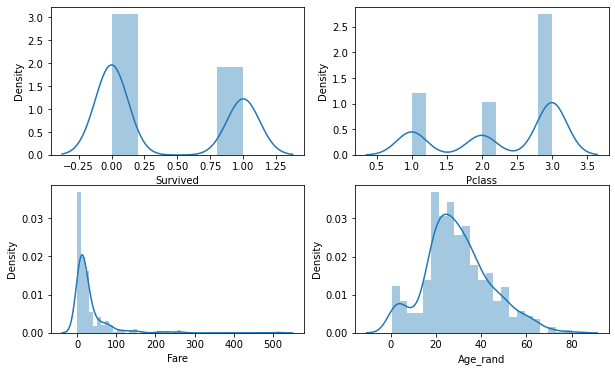

In [13]:
plt.figure(figsize=(10,6))
for i in enumerate(feature):
    plt.subplot(2,2,i[0]+1)
    sns.distplot(df[i[1]])

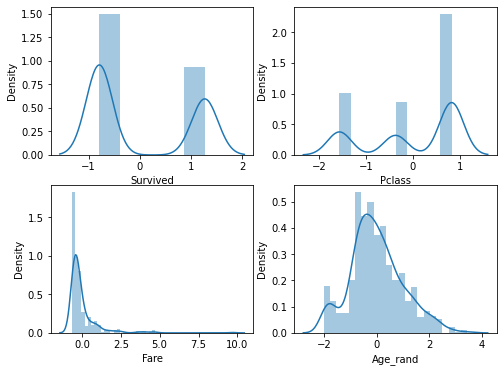

In [14]:
plt.figure(figsize=(8,6))
for i in enumerate(features):
    plt.subplot(2,2,i[0]+1)
    sns.distplot(df_stand[i[1]])

## 2. Normalization or Min Max Scaling  (### CNN)---Deep Learning Techniques
Min Max Scaling scales the values between 0 to 1.

X_scaled = (X - X.min / (X.max - X.min)

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
min_max=MinMaxScaler()

In [17]:
df_norm=pd.DataFrame(min_max.fit_transform(df),columns=df.columns)
df_norm.head()

,Survived,Pclass,Fare,Age_rand
0,0.0,1.0,0.014151,0.271174
1,1.0,0.0,0.139136,0.472229
2,1.0,1.0,0.015469,0.321438
3,1.0,0.0,0.103644,0.434531
4,0.0,1.0,0.015713,0.434531


In [52]:
# Comparing the df and df_norm values. In df_norm dataframe, features values lies between 0 to 1.

In [18]:
features=list(df_norm.columns)
feature=list(df.columns)

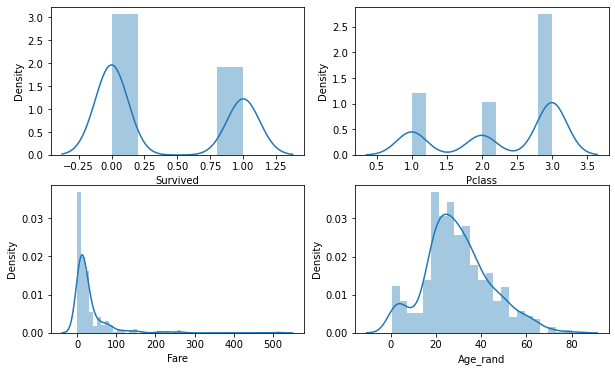

In [19]:
plt.figure(figsize=(10,6))
for i in enumerate(feature):
    plt.subplot(2,2,i[0]+1)
    sns.distplot(df[i[1]])

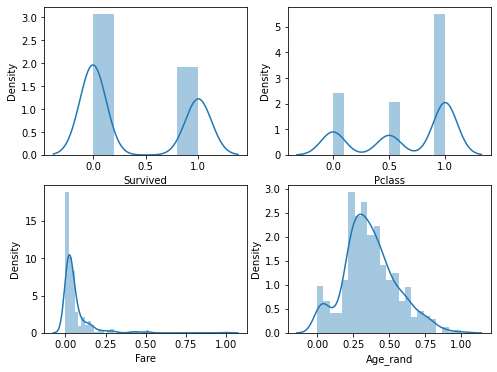

In [20]:
plt.figure(figsize=(8,6))
for i in enumerate(features):
    plt.subplot(2,2,i[0]+1)
    sns.distplot(df_norm[i[1]])

## 3. Robust scaler or Scaling To Median And Quantiles

It is used to scale the feature to median and quantiles. 
Scaling using median and quantiles consists of substracting the median to all the observations, and then dividing by the interquantile difference. The interquantile difference is the difference between the 75th and 25th quantile:

IQR = 75th quantile - 25th quantile

X_scaled = (X - X.median) / IQR

eg : 0,1,2,3,4,5,6,7,8,9,10

9-90 percentile---90% of all values in this group is less than 9

1-10 precentile---10% of all values in this group is less than 1


In [21]:
from sklearn.preprocessing import RobustScaler

In [22]:
scaler=RobustScaler()
df_robust=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
df_robust.head()

,Survived,Pclass,Fare,Age_rand
0,0.0,0.0,-0.312011,-0.352941
1,1.0,-2.0,2.461242,0.588235
2,1.0,0.0,-0.282777,-0.117647
3,1.0,-2.0,1.673732,0.411765
4,0.0,0.0,-0.277363,0.411765


In [26]:
#### Comparing the df and df_robust values. 

In [23]:
features=list(df_robust.columns)
feature=list(df.columns)

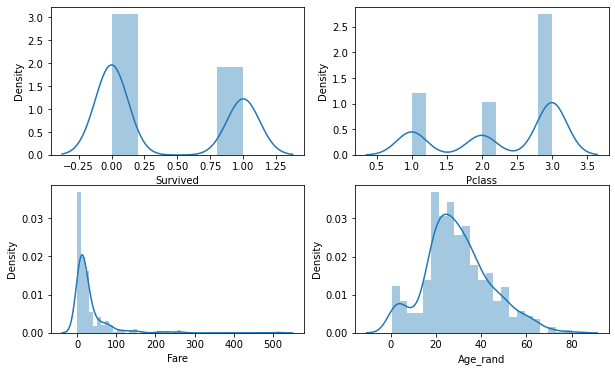

In [24]:
plt.figure(figsize=(10,6))
for i in enumerate(feature):
    plt.subplot(2,2,i[0]+1)
    sns.distplot(df[i[1]])

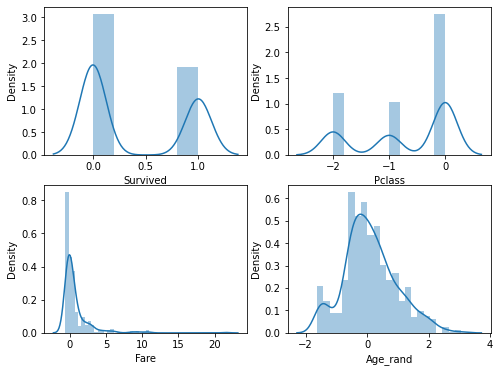

In [25]:
plt.figure(figsize=(8,6))
for i in enumerate(features):
    plt.subplot(2,2,i[0]+1)
    sns.distplot(df_robust[i[1]])

## 4.Guassian Transformation

Some machine learning algorithms like linear and logistic assume that the features are normally distributed. It improves good accuracy and performance.

- logarithmic transformation
- reciprocal transformation
- square root transformation
- exponential transformation (more general, you can use any exponent)
- boxcox transformation


In [22]:
import scipy.stats as stat
import pylab

In [49]:
# creating function for gaussian plots. If function is created then it is easy to check all transformation.

In [31]:
def plot(df,variable):
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    sns.distplot(df[variable])
    plt.subplot(1,2,2)
    stat.probplot(df[variable],plot=pylab)

In [47]:
# This is normal gaussian transform this is done by Q-Q plot

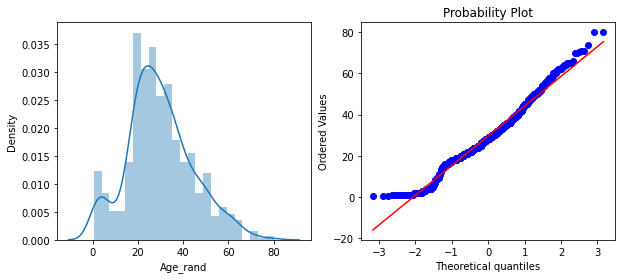

In [32]:
plot(df,'Age_rand')

### (i) logarithmic transformation
Taking the log values for respective feature and plotting by function. For right or left skewed feature logarithmic transformation is best

<IPython.core.display.Javascript object>

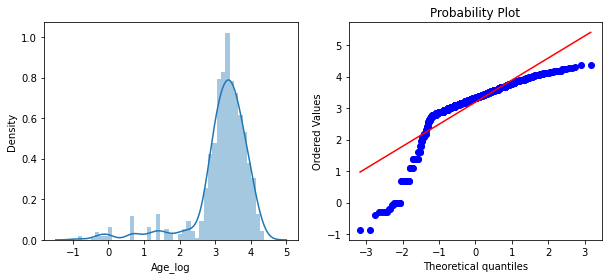

In [33]:
df['Age_log']=np.log(df.Age_rand)
plot(df,'Age_log')

In [43]:
# If the feature value has zero logarithmic transformation shows error. use (log + 1) or log1p

In [44]:
# df['Fare_log']=np.log(df.Fare)            ## This shows error because of zero
# plot(df,'Fare_log')

<IPython.core.display.Javascript object>

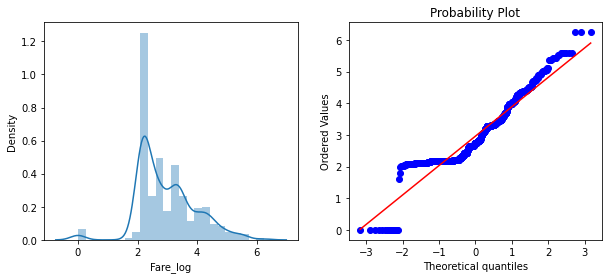

In [40]:
df['Fare_log']=np.log1p(df.Fare)
plot(df,'Fare_log')

<IPython.core.display.Javascript object>

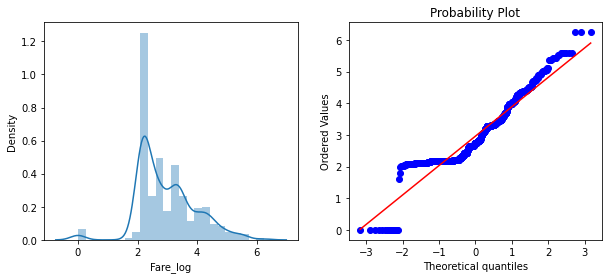

In [41]:
df['Fare_log']=np.log(df.Fare+1)
plot(df,'Fare_log')

### (ii) reciprocal transformation
Basicaly it is math concept. In simple terms Reciprocating is dividing the value(feature) by 1.

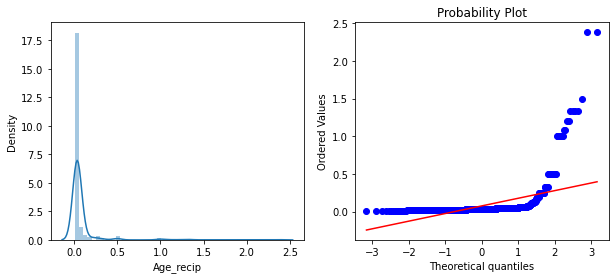

In [34]:
df['Age_recip']=1/df.Age_rand
plot(df,'Age_recip')

### (iii) square root transformation
Taking square root of feature

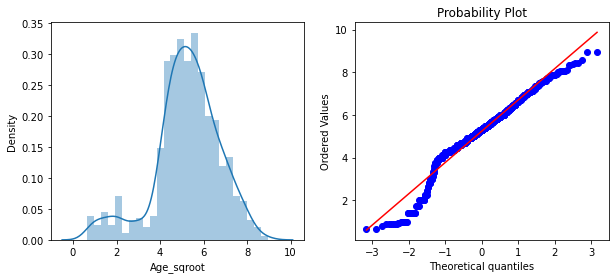

In [35]:
df['Age_sqroot']=df['Age_rand']**(1/2)
plot(df,'Age_sqroot')

### (iv) exponential transformation (more general, you can use any exponent)
Taking exponential value of feature 

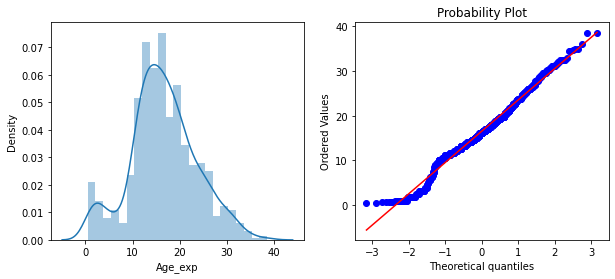

In [36]:
df['Age_exp']=df['Age_rand']**(1/1.2)
plot(df,'Age_exp')

### (v) boxcox transformation
The Box-Cox transformation is defined as: 

T(Y)=(Y exp(λ)−1)/λ

where Y is the response variable and λ is the transformation parameter. λ varies from -5 to 5. In the transformation, all values of λ  are considered and the optimal value for a given variable is selected.

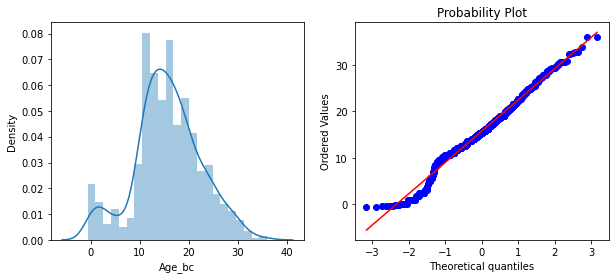

In [37]:
df['Age_bc'],parameter=stat.boxcox(df['Age_rand'])
plot(df,'Age_bc')

In [ ]:
# For this ['age'] feature Boxcox transformation or nornal gausian transformation suits well.